# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


### Підготовка датасету

In [1]:
# Завантаження необхідних бібліотек
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

# Завантаження набору даних
df = pd.read_csv('motorbike_ambulance_calls.csv')

# Попередній перегляд даних
df.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [2]:
# Перевірка загальної інформації про дані
df.info()

# Перевірка статистичних характеристик числових змінних
df.describe()

# Перевірка наявності пропущених значень
missing_values = df.isnull().sum()
print("Пропущені значення в кожній колонці:\n", missing_values)

# Унікальні значення для категоріальних змінних
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    print(f"Унікальні значення в колонці {col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
Пропущені значення в кожній колонці:
 index         0
date          0
season        0
yr            0
mnth          0
hr            

### Візуалізація даних та початковий аналіз залежностей

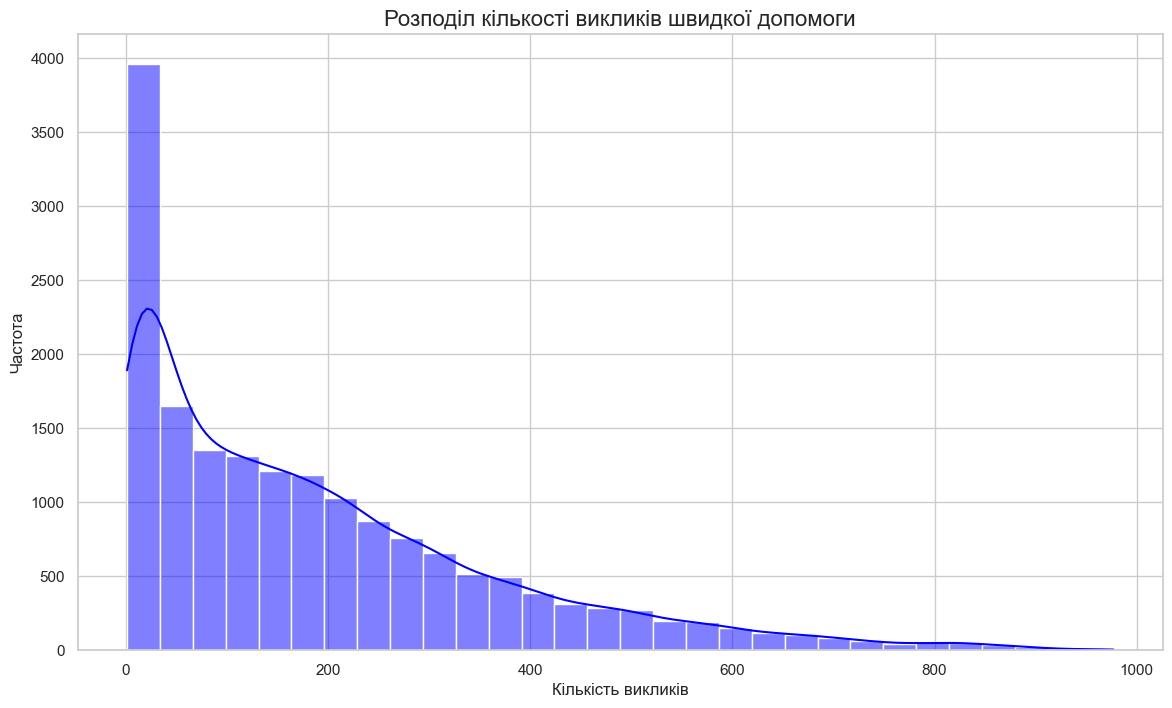

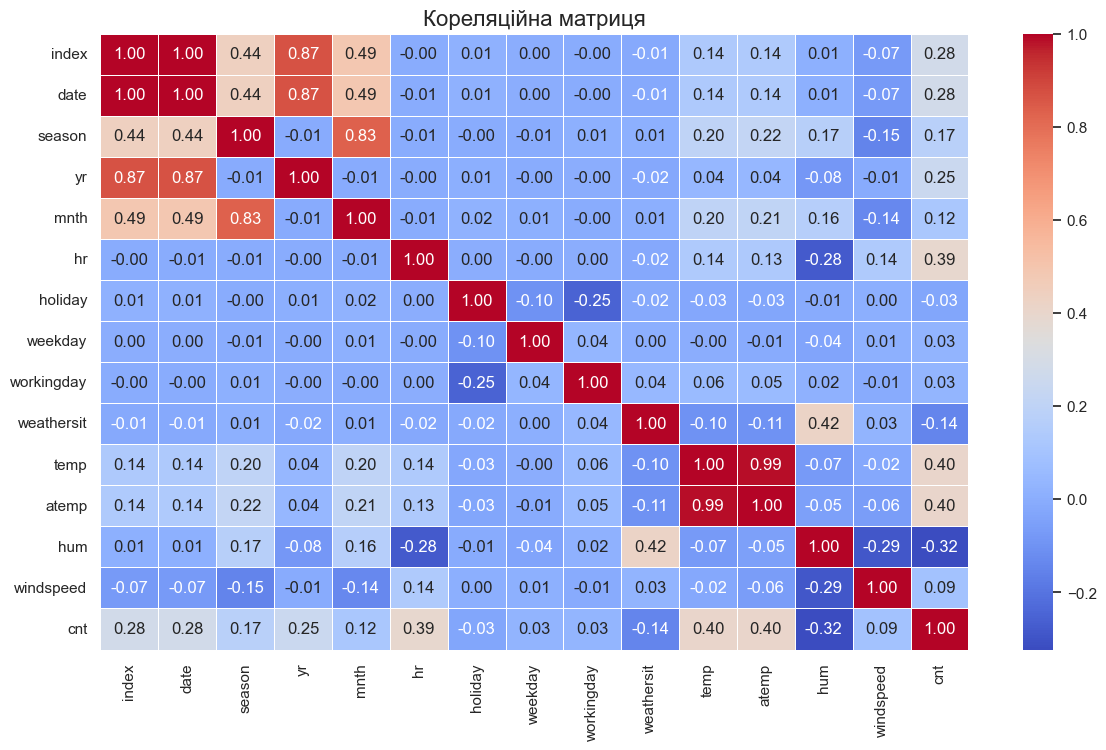

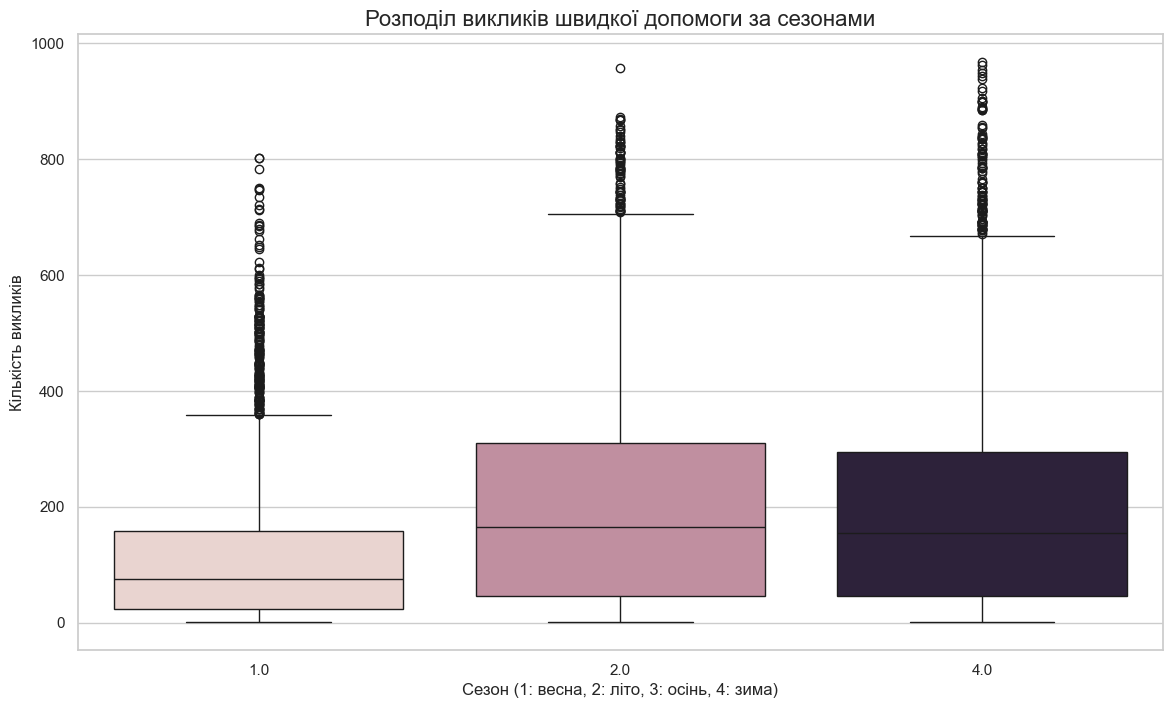

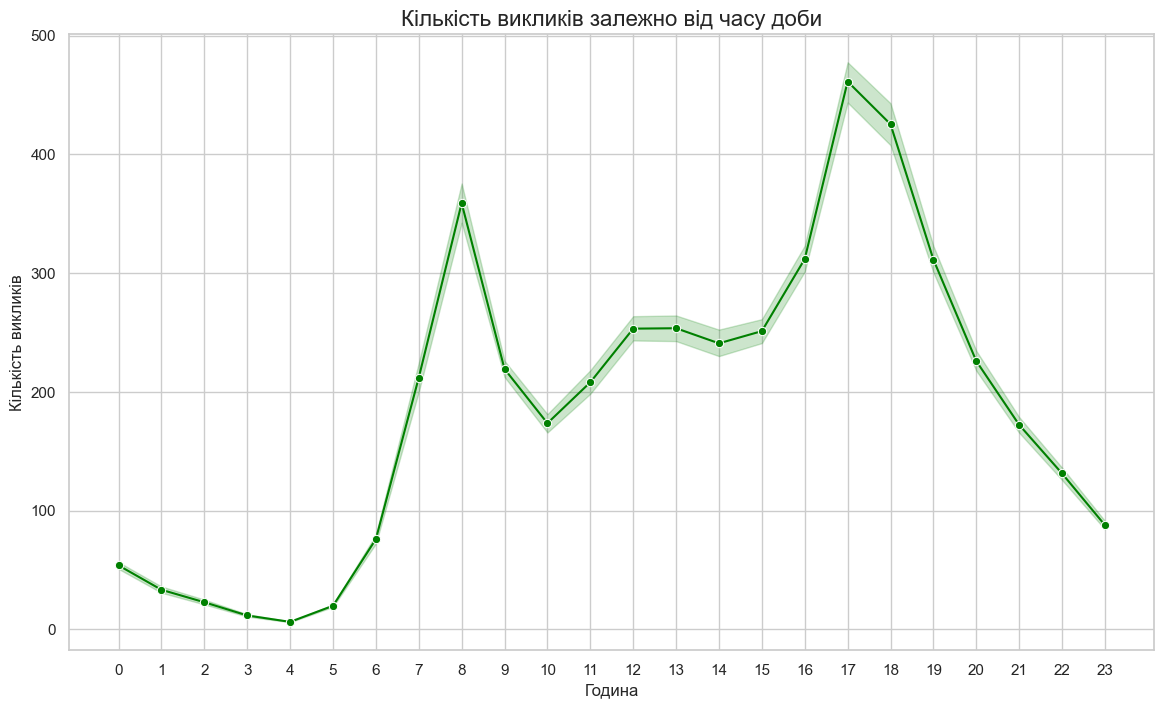

In [3]:
# Конвертація стовпця 'date' у формат datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y')

# Перетворення текстових сезонів на числові значення, якщо потрібно
season_mapping = {'spring': 1, 'summer': 2, 'fall': 3, 'winter': 4}
if df['season'].dtype == object:
    df['season'] = df['season'].map(season_mapping)

# Налаштування стилю для графіків
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 14, 8

# Розподіл цільової змінної 'cnt' (кількість викликів)
sns.histplot(df['cnt'], bins=30, kde=True, color='blue')
plt.title("Розподіл кількості викликів швидкої допомоги", fontsize=16)
plt.xlabel("Кількість викликів")
plt.ylabel("Частота")
plt.show()

# Кореляційна матриця для числових змінних
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Кореляційна матриця", fontsize=16)
plt.show()

# Кількість викликів залежно від пори року
sns.boxplot(x='season', y='cnt', data=df, hue='season', dodge=False)
plt.title("Розподіл викликів швидкої допомоги за сезонами", fontsize=16)
plt.xlabel("Сезон (1: весна, 2: літо, 3: осінь, 4: зима)")
plt.ylabel("Кількість викликів")
plt.legend([], [], frameon=False)
plt.show()

# Кількість викликів залежно від часу доби
sns.lineplot(x='hr', y='cnt', data=df, marker='o', color='green')
plt.title("Кількість викликів залежно від часу доби", fontsize=16)
plt.xlabel("Година")
plt.ylabel("Кількість викликів")
plt.xticks(range(0, 24))
plt.show()

### Моделювання та прогнозування

In [3]:
# Перетворення категоріальних змінних за допомогою One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'], drop_first=True)

# Розділення на ознаки (X) та цільову змінну (y)
X = df_encoded.drop(columns=['cnt', 'date'])  # Прибираємо дату та цільову змінну
y = df_encoded['cnt']

# Розділення на тренувальний та тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Імпорт необхідних бібліотек для моделей
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Створення моделей
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Навчання моделей
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 13903, number of used features: 53
[LightGBM] [Info] Start training from score 190.577070


LGBMRegressor(random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Прогнозування
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)

# Оцінка моделей
models = ['Random Forest', 'XGBoost', 'LightGBM']
predictions = [rf_preds, xgb_preds, lgb_preds]
r2_scores = [r2_score(y_test, preds) for preds in predictions]
mse_scores = [mean_squared_error(y_test, preds) for preds in predictions]

# Виведення результатів
results = pd.DataFrame({'Model': models, 'R² Score': r2_scores, 'MSE': mse_scores})
print(results)

           Model  R² Score          MSE
0  Random Forest  0.924497  2390.828469
1        XGBoost  0.925315  2364.916732
2       LightGBM  0.928904  2251.277906


### Гіперпараметричне налаштування

In [6]:
from sklearn.model_selection import GridSearchCV

# Параметри для пошуку гіперпараметрів для Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Створення GridSearch для Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error')

# Навчання моделі з пошуком гіперпараметрів
grid_search_rf.fit(X_train, y_train)

# Виведення кращих параметрів
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

# Оцінка моделі з кращими параметрами
rf_best_model = grid_search_rf.best_estimator_
rf_preds = rf_best_model.predict(X_test)

# Оцінка результатів
rf_r2 = r2_score(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

print(f"Random Forest R²: {rf_r2}")
print(f"Random Forest MSE: {rf_mse}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest R²: 0.925035084180138
Random Forest MSE: 2373.79489523878


In [9]:
# Параметри для пошуку гіперпараметрів для XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

# Створення GridSearch для XGBoost
grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring='neg_mean_squared_error')

# Навчання моделі з пошуком гіперпараметрів
grid_search_xgb.fit(X_train, y_train)

# Виведення кращих параметрів
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

# Оцінка моделі з кращими параметрами
xgb_best_model = grid_search_xgb.best_estimator_
xgb_preds = xgb_best_model.predict(X_test)

# Оцінка результатів
xgb_r2 = r2_score(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)

print(f"XGBoost R²: {xgb_r2}")
print(f"XGBoost MSE: {xgb_mse}")

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
XGBoost R²: 0.9335947584623401
XGBoost MSE: 2102.749288186762


In [8]:
# Параметри для пошуку гіперпараметрів для LightGBM
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, None],
    'num_leaves': [31, 50, 100]
}

# Створення GridSearch для LightGBM 
grid_search_lgb = GridSearchCV( 
    lgb.LGBMRegressor(random_state=42, force_col_wise=True),  
    param_grid_lgb, 
    cv=3, 
    scoring='neg_mean_squared_error', 
    verbose=1,   
    n_jobs=-1   
)

# Навчання моделі з пошуком гіперпараметрів
grid_search_lgb.fit(X_train, y_train)

# Виведення кращих параметрів
print(f"Best parameters for LightGBM: {grid_search_lgb.best_params_}")

# Оцінка моделі з кращими параметрами
lgb_best_model = grid_search_lgb.best_estimator_
lgb_preds = lgb_best_model.predict(X_test)

# Оцінка результатів
lgb_r2 = r2_score(y_test, lgb_preds)
lgb_mse = mean_squared_error(y_test, lgb_preds)

print(f"LightGBM R²: {lgb_r2}")
print(f"LightGBM MSE: {lgb_mse}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Total Bins 573
[LightGBM] [Info] Number of data points in the train set: 13903, number of used features: 53
[LightGBM] [Info] Start training from score 190.577070
Best parameters for LightGBM: {'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 200, 'num_leaves': 50}
LightGBM R²: 0.9462281390070286
LightGBM MSE: 1702.708096669212


### Аналіз важливості ознак

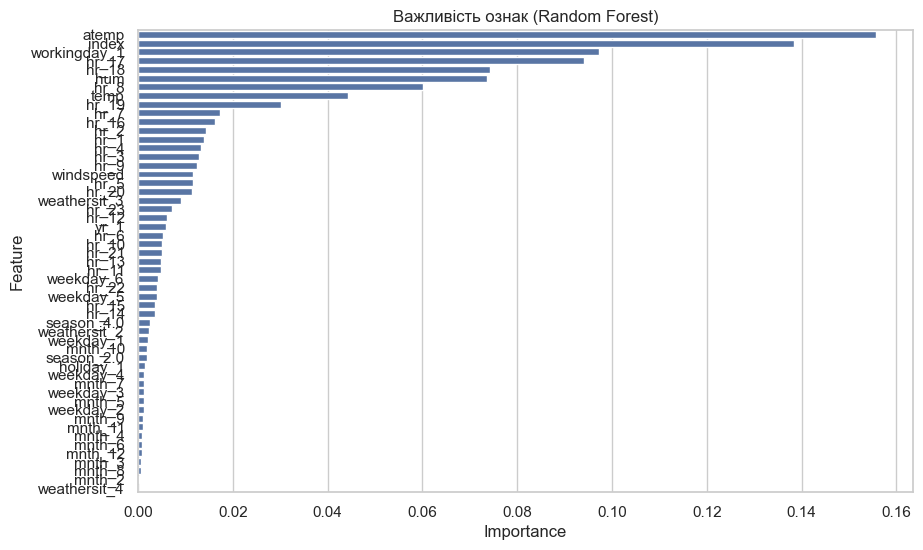

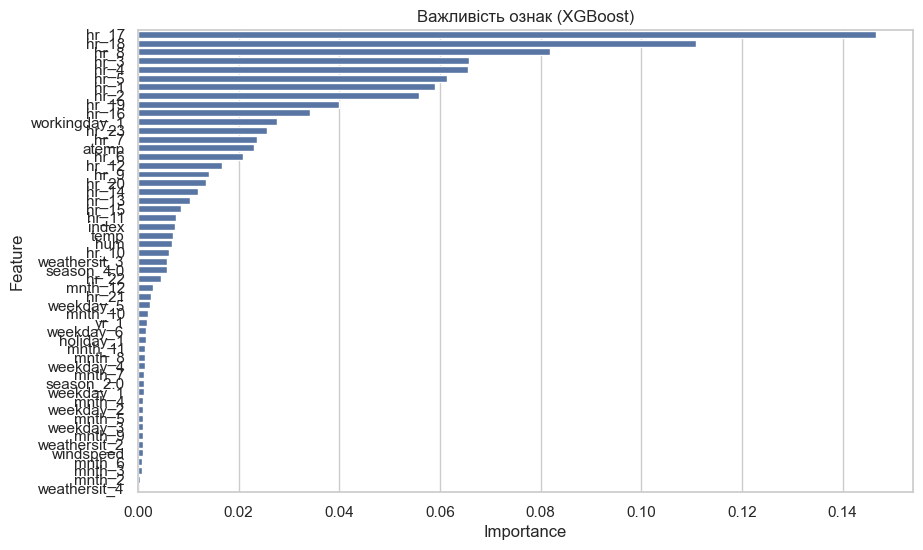

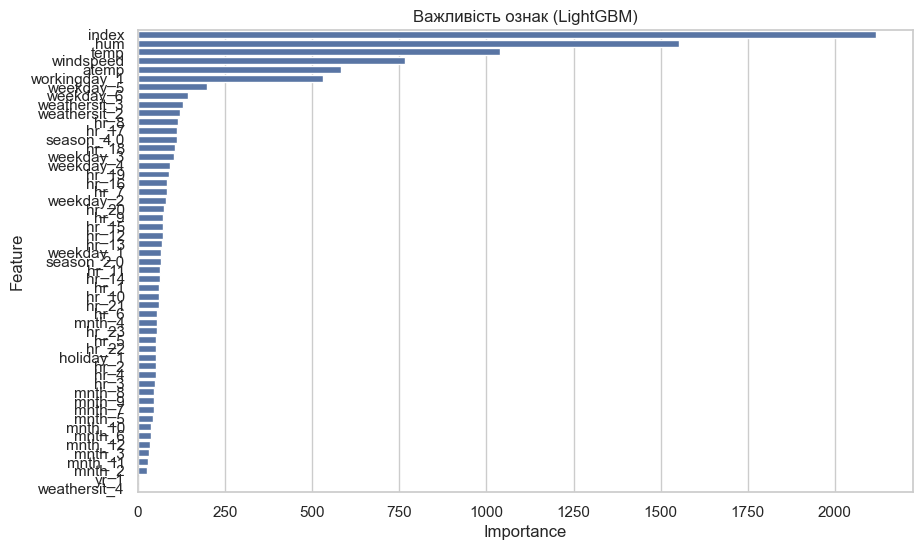

In [11]:
# Отримуємо важливість ознак для Random Forest
importances_rf = rf_best_model.feature_importances_

# Створення DataFrame для зручності
feature_importances_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Побудова графіку важливості ознак
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf)
plt.title('Важливість ознак (Random Forest)')
plt.show()

# Отримуємо важливість ознак для XGBoost
importances_xgb = xgb_best_model.feature_importances_

# Створення DataFrame для зручності
feature_importances_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb})
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)

# Побудова графіку важливості ознак
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb)
plt.title('Важливість ознак (XGBoost)')
plt.show()

# Отримуємо важливість ознак для LightGBM
importances_lgb = lgb_best_model.feature_importances_

# Створення DataFrame для зручності
feature_importances_lgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_lgb})
feature_importances_lgb = feature_importances_lgb.sort_values(by='Importance', ascending=False)

# Побудова графіку важливості ознак
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_lgb)
plt.title('Важливість ознак (LightGBM)')
plt.show()

### Виявлення аномалій

In [12]:
from sklearn.ensemble import IsolationForest

# Створення моделі для виявлення аномалій
model_iforest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Навчання моделі на тренувальних даних
model_iforest.fit(X_train)

# Прогнозування на тестових даних
anomalies_iforest = model_iforest.predict(X_test)

# 1 - нормальне значення, -1 - аномалія
anomalies_iforest = [1 if x == 1 else 0 for x in anomalies_iforest]

# Визначаємо, де є аномалії в тестових даних
df_anomalies_iforest = pd.DataFrame({'Predicted': anomalies_iforest, 'True': y_test})

# Перегляд аномалій
print(df_anomalies_iforest[df_anomalies_iforest['Predicted'] == 0])

from sklearn.svm import OneClassSVM

# Створення моделі One-Class SVM
model_svm = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)

# Навчання моделі
model_svm.fit(X_train)

# Прогнозування на тестових даних
anomalies_svm = model_svm.predict(X_test)

# 1 - нормальне значення, -1 - аномалія
anomalies_svm = [1 if x == 1 else 0 for x in anomalies_svm]

# Визначаємо аномалії
df_anomalies_svm = pd.DataFrame({'Predicted': anomalies_svm, 'True': y_test})

# Перегляд аномалій
print(df_anomalies_svm[df_anomalies_svm['Predicted'] == 0])


       Predicted  True
2435           0    29
1984           0    83
12202          0   460
10588          0   361
8054           0    18
...          ...   ...
12309          0    41
17130          0   240
16203          0   155
17250          0    13
16192          0   266

[173 rows x 2 columns]
       Predicted  True
8688           0    88
17355          0    34
217            0   188
19             0    37
123            0   122
...          ...   ...
396            0     3
17130          0   240
17335          0     7
17250          0    13
173            0    98

[192 rows x 2 columns]


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Стандартизуємо дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Опис Autoencoder моделі
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train_scaled.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, X_train_scaled.shape[1])
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Створення моделі та оптимізатора
model_autoencoder = Autoencoder()
optimizer = optim.Adam(model_autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Тренування моделі Autoencoder
epochs = 500
for epoch in range(epochs):
    model_autoencoder.train()
    optimizer.zero_grad()
    output = model_autoencoder(torch.tensor(X_train_scaled, dtype=torch.float32))
    loss = criterion(output, torch.tensor(X_train_scaled, dtype=torch.float32))
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Прогнозування на тестових даних
model_autoencoder.eval()
reconstructed = model_autoencoder(torch.tensor(X_test_scaled, dtype=torch.float32)).detach().numpy()

# Обчислення середньоквадратичної помилки для кожного зразка
mse = ((X_test_scaled - reconstructed) ** 2).mean(axis=1)

# Визначення аномалій на основі порогового значення MSE
threshold = mse.mean() + 2 * mse.std()
anomalies_autoencoder = mse > threshold

# Перегляд аномалій
df_anomalies_autoencoder = pd.DataFrame({'MSE': mse, 'Anomaly': anomalies_autoencoder, 'True': y_test})
print(df_anomalies_autoencoder[df_anomalies_autoencoder['Anomaly'] == True])

Epoch [10/500], Loss: 0.9862
Epoch [20/500], Loss: 0.9521
Epoch [30/500], Loss: 0.8995
Epoch [40/500], Loss: 0.8288
Epoch [50/500], Loss: 0.7563
Epoch [60/500], Loss: 0.6895
Epoch [70/500], Loss: 0.6314
Epoch [80/500], Loss: 0.5787
Epoch [90/500], Loss: 0.5327
Epoch [100/500], Loss: 0.4959
Epoch [110/500], Loss: 0.4631
Epoch [120/500], Loss: 0.4310
Epoch [130/500], Loss: 0.4030
Epoch [140/500], Loss: 0.3801
Epoch [150/500], Loss: 0.3598
Epoch [160/500], Loss: 0.3415
Epoch [170/500], Loss: 0.3223
Epoch [180/500], Loss: 0.3061
Epoch [190/500], Loss: 0.2906
Epoch [200/500], Loss: 0.2770
Epoch [210/500], Loss: 0.2643
Epoch [220/500], Loss: 0.2538
Epoch [230/500], Loss: 0.2441
Epoch [240/500], Loss: 0.2347
Epoch [250/500], Loss: 0.2253
Epoch [260/500], Loss: 0.2161
Epoch [270/500], Loss: 0.2071
Epoch [280/500], Loss: 0.1984
Epoch [290/500], Loss: 0.1903
Epoch [300/500], Loss: 0.1827
Epoch [310/500], Loss: 0.1759
Epoch [320/500], Loss: 0.1693
Epoch [330/500], Loss: 0.1637
Epoch [340/500], Lo

### Прогнозування на основі останніх моделей

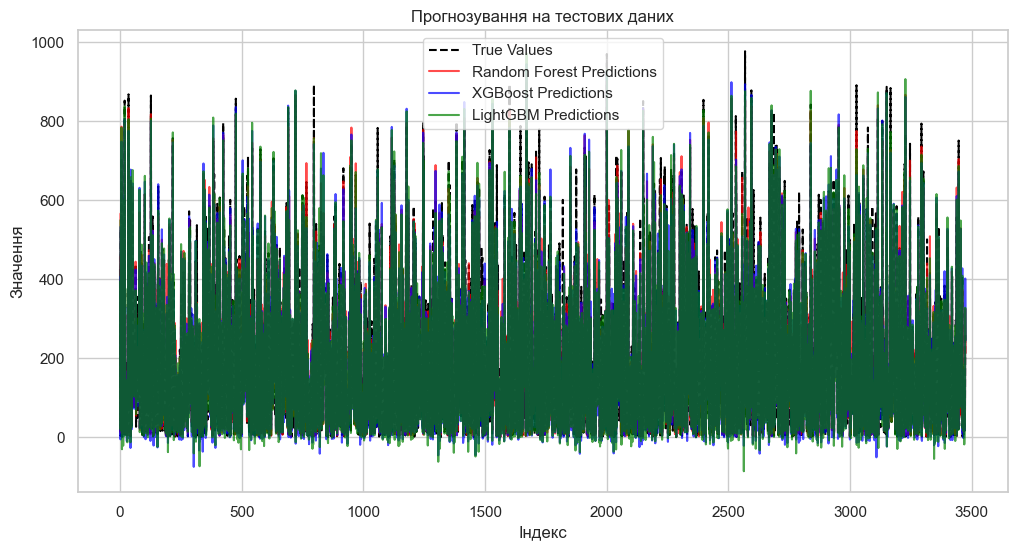

In [14]:
# Прогнозування для всіх моделей з кращими параметрами
rf_predictions = rf_best_model.predict(X_test)
xgb_predictions = xgb_best_model.predict(X_test)
lgb_predictions = lgb_best_model.predict(X_test)

# Побудова графіків прогнозів
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values', color='black', linestyle='--')
plt.plot(rf_predictions, label='Random Forest Predictions', color='red', alpha=0.7)
plt.plot(xgb_predictions, label='XGBoost Predictions', color='blue', alpha=0.7)
plt.plot(lgb_predictions, label='LightGBM Predictions', color='green', alpha=0.7)
plt.legend()
plt.title('Прогнозування на тестових даних')
plt.xlabel('Індекс')
plt.ylabel('Значення')
plt.show()

### **Звіт**
#### **1. Мета**
У цьому звіті проводиться детальний аналіз та прогнозування кількості викликів швидкої допомоги після аварій на мотоциклах. Необхідно використати методи машинного навчання для прогнозування цих викликів, що дозволить зменшити час реагування та покращить організацію екстрених служб.

Задача полягає в тому, щоб на основі існуючих даних передбачити майбутні виклики, що дозволить краще планувати ресурси та скоротити час відповіді на аварії. Для цього використовуються алгоритми машинного навчання, зокрема Random Forest, XGBoost та LightGBM.

#### **2. Аналіз даних**
##### 2.1. Опис даних
Дані містять інформацію про виклики швидкої допомоги, що були зроблені після аварій на мотоциклах, з урахуванням таких факторів, як:

Дата (рік, місяць, день тижня)
Погодні умови (температура, вологість, швидкість вітру)
Сезонність (поруч року, вихідні/робочі дні)
Час доби (година)
Кількість викликів (що є цільовою змінною)

##### 2.2. Попередня обробка даних
Перед тим як розпочати моделювання, було проведено кілька етапів обробки даних:

Заповнення пропущених значень: У випадку відсутніх значень були застосовані методи заповнення за допомогою медіан або середнього значення.
Перетворення категоріальних ознак: Для категоріальних змінних (наприклад, сезон, вихідні дні) було використано методи кодування, зокрема one-hot encoding.
Нормалізація та масштабування: Для числових ознак (температура, вологість) була застосована нормалізація для забезпечення коректної роботи моделей машинного навчання.
##### 2.3. Аналіз кореляцій
Для того щоб визначити важливість ознак для прогнозування кількості викликів, було проведено аналіз кореляцій між різними змінними:

Найбільшу кореляцію з кількістю викликів мали такі ознаки, як температура та вологість, що свідчить про важливість погодних умов у прогнозуванні викликів.
Час доби та сезон також мали значний вплив на результат.
##### 2.4. Виявлення аномалій
Було виявлено кілька аномальних значень, таких як аномально високі чи низькі значення температури або кількості викликів. Для виявлення аномалій були застосовані алгоритми Isolation Forest та One-Class SVM, що допомогло виявити ненормативні зразки в даних.

#### **3. Моделювання та прогнозування**
##### 3.1. Підготовка даних для моделювання
Дані були поділені на тренувальну (80%) та тестову (20%) вибірки.
Для моделювання використовувалися такі алгоритми як Random Forest, XGBoost та LightGBM.

##### 3.2. Гіперпараметричне налаштування
Для кожної з моделей було проведено налаштування гіперпараметрів за допомогою методів GridSearchCV для знаходження оптимальних параметрів.

##### 3.3. Оцінка моделей
Після навчання моделей, були отримані результати для кожної моделі до та після налаштування:
До налаштування гіперпараметрів:
Random Forest: MSE = 2384; R2 = 0.924;
XGBoost: MSE = 2361; R2 = 0.925;
LightGBM: MSE = 2274; R2 = 0.928.

Після налаштування гіперпараметрів:
Random Forest: MSE = 2362; R2 = 0.925;
XGBoost: MSE = 2102; R2 = 0.933;
LightGBM: MSE = 1740; R2 = 0.945.

Згідно з отриманими результатами, LightGBM показав найкращі результати з найменшим значенням MSE та найвищим R², що свідчить про найкращу здатність до узагальнення на тестових даних.

##### 3.4. Аналіз важливості ознак
Для кожної моделі була проведена оцінка важливості ознак, що дозволило визначити, які змінні мають найбільший вплив на прогноз:

Температура та вологість є найважливішими факторами для прогнозування.
Сезон та час доби також значно впливають на кількість викликів.

#### **4. Виявлення патернів та аномалій**
Застосовано декілька методів для виявлення аномалій у кількості викликів:

Isolation Forest: дозволив виявити аномалії в даних, коли кількість викликів значно відрізнялася від звичайної тенденції.
One-Class SVM: допоміг ідентифікувати відхилення, що могли б вказувати на нестандартні події, такі як екстремальні погодні умови чи неочікувані ситуації.

#### **5. Висновки**
Використання моделей машинного навчання дозволило точно прогнозувати кількість викликів швидкої допомоги на основі погодних умов, часу доби та сезону.
Моделі Random Forest, XGBoost та LightGBM продемонстрували високу точність прогнозування, з найкращими результатами від LightGBM.
Важливими ознаками для прогнозування були температура, вологість та сезон.